In [1]:
from math import e #eulers number
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases #dictionary of encoding names and associated alias
%matplotlib inline 

# Introduction:
The purpose of this script is to compare my personal best 1 repetition max weight for the bench press and squat against common estimation formulas. These formulas use weight (W) and repetitions (R) to estimate a 1 repetition max. I have chosen the bench press and squat movements as I recently completed a 1 repetition max and a 5 repetition max for these exercises. The 5 repetition max will be used in all estimations.

### Variables and Constants:
- W: Weight lifted, measured in pounds
- R: Repetitions, or the number of times the movement is completed with the specified weight
- E: Euler's number, a mathematical constant used in the Mayhew and Wathan equations

### The Formulas:
- Brzycki = W / (1.0278 - (0.0278 * R))
- Epley = W * (1 + (0.0333 * R))
- Lander = 100 * (W / (101.3 - (2.61723 * R)))
- McGlothin = (100 * W) / (101.3 - (2.67123 * R))
- Lombardi = W * (R ** 0.10)
- Mayhew = (100 * W) / (52.2 + (41.9 * e ** (-0.055 * R)))
- O'Connor = W * (1 + 0.025 * R)
- Wathan = (100 * W) / (48.8 + (53.8 * e ** (-0.075 * R)))

### Notes:
- The number of repetitions (R) used should be the number of consecutive repetitions completed without setting the weight down or resting.
- The exercise should have been completed by the individual without assistance from another person.
- These formulas were designed for compound exercises such as the bench press, squat, and deadlift.

# Process
## Data Collection
### 1 Rep max calculation function

In [2]:
def rm2(w, r): #return 1rm estimations based on weight(w) and reps(r)
    brzycki = w/(1.0278-(.0278*r)) 
    epley = w*(1+(.0333*r))
    lander = 100*(w/(101.3-(2.61723*r)))
    mcglothin = (100*w)/(101.3 - (2.67123*r))
    lombardi = w*(r**.10)
    mayhew = (100*w)/(52.2+(41.9*e**(-.055*r)))
    oconnor = w*(1+.025*r)
    wathan = (100*w)/(48.8+(53.8*e**(-.075*r)))
    return [['Brzycki',brzycki],['Epley',epley],['Lander',lander],['Mcglothin',mcglothin],
            ['Lombardi',lombardi],['Mayhew',mayhew,], ['Oconnor',oconnor], ['Wathan',wathan]]
    


In [3]:
squat=rm2(270, 5)
bench=rm2(225,5)

### myround function
Most gyms use weight increments of 2.5 or 5 pounds. I used this rounding function to round the raw numbers to the nearest increment(base) of 2.5 pounds

In [4]:
def myround(x, base): #round x to nearest base value
    return base * round(x/base)

## Data Cleaning

### Create dataframe for Squat data

In [5]:
df_squat = pd.DataFrame(squat)
df_squat.columns=['Calc_name','Max']
df_squat['Inc_25'] = myround(df_squat['Max'],2.5) 
df_squat.head()
df_squat.loc[len(df_squat.index)] = ['Actual', 290, 290] 
df_squat = df_squat.sort_values('Calc_name')
df_squat = df_squat.drop_duplicates()
print(df_squat)

   Calc_name         Max  Inc_25
8     Actual  290.000000   290.0
0    Brzycki  303.780378   305.0
1      Epley  314.955000   315.0
2     Lander  306.074386   305.0
4   Lombardi  317.147115   317.5
5     Mayhew  321.328837   322.5
3  Mcglothin  307.014078   307.5
6    Oconnor  303.750000   305.0
7     Wathan  314.772764   315.0


### Create dataframe for Bench data

In [6]:
df_bench = pd.DataFrame(bench)
df_bench.columns = ['Calc_name','Max']
df_bench['Inc_25'] = myround(df_bench['Max'],2.5)
df_bench.loc[len(df_bench.index)] = ['Actual', 235, 235] 
df_bench = df_bench.sort_values('Calc_name')
print(df_bench)

   Calc_name         Max  Inc_25
8     Actual  235.000000   235.0
0    Brzycki  253.150315   252.5
1      Epley  262.462500   262.5
2     Lander  255.061989   255.0
4   Lombardi  264.289262   265.0
5     Mayhew  267.774031   267.5
3  Mcglothin  255.845065   255.0
6    Oconnor  253.125000   252.5
7     Wathan  262.310637   262.5


### Cleaned tables

In [7]:
df_s_styled = df_squat.style.set_caption('Squat')
df_b_styled = df_bench.style.set_caption('Bench')

from IPython.display import HTML

def display_dfs(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))
dfs = [df_s_styled, df_b_styled]
display_dfs(dfs)

,Calc_name,Max,Inc_25
8,Actual,290.000000,290.000000
0,Brzycki,303.780378,305.000000
1,Epley,314.955000,315.000000
2,Lander,306.074386,305.000000
4,Lombardi,317.147115,317.500000
5,Mayhew,321.328837,322.500000
3,Mcglothin,307.014078,307.500000
6,Oconnor,303.750000,305.000000
7,Wathan,314.772764,315.000000
,Calc_name,Max,Inc_25


## Visualizing the Data

### Squat

Text(0.5, 1.0, 'Squat 1RM: Calculated vs Actual')

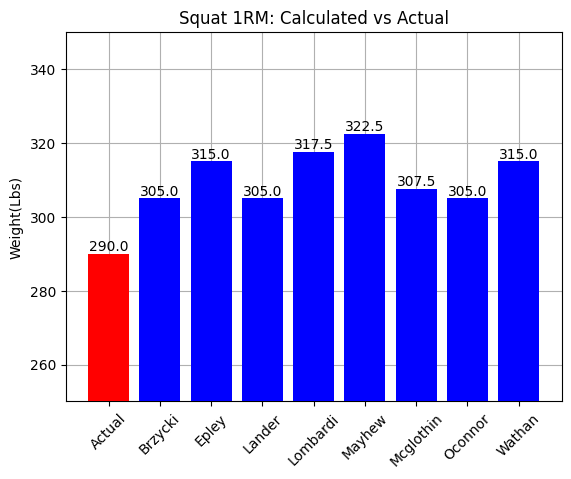

In [8]:
x1 = df_squat.Calc_name
y1 = df_squat.Inc_25
colors = ['b'] * 9
colors[0] = 'r'
ax1 = plt.bar(x1, y1, color = colors, zorder=3)
plt.bar_label(ax1, labels=y1,label_type='edge', zorder=3)
#sns.boxplot(data = y)
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.ylim(250, 350)
plt.ylabel('Weight(Lbs)')
plt.title('Squat 1RM: Calculated vs Actual')

### Bench

Text(0.5, 1.0, 'Bench 1RM: Calculated vs Actual')

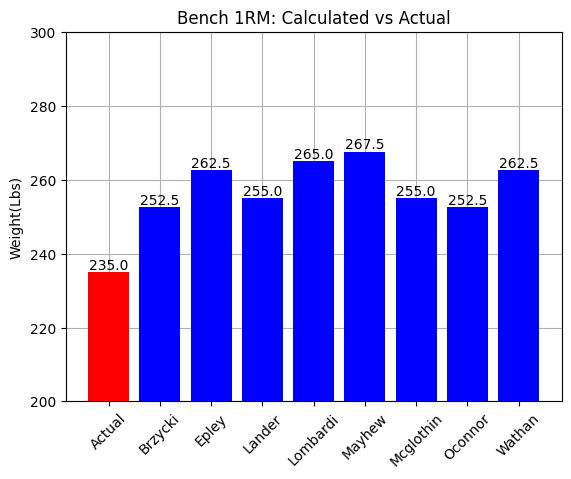

In [9]:
x2 = df_bench.Calc_name
y2 = df_bench.Inc_25
ax2 = plt.bar(x2, y2, color = colors, zorder=3)
plt.bar_label(ax2, labels=y2,label_type='edge', zorder=3)
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.ylim(200, 300)
plt.ylabel('Weight(Lbs)')
plt.title('Bench 1RM: Calculated vs Actual')

### Side-by-side

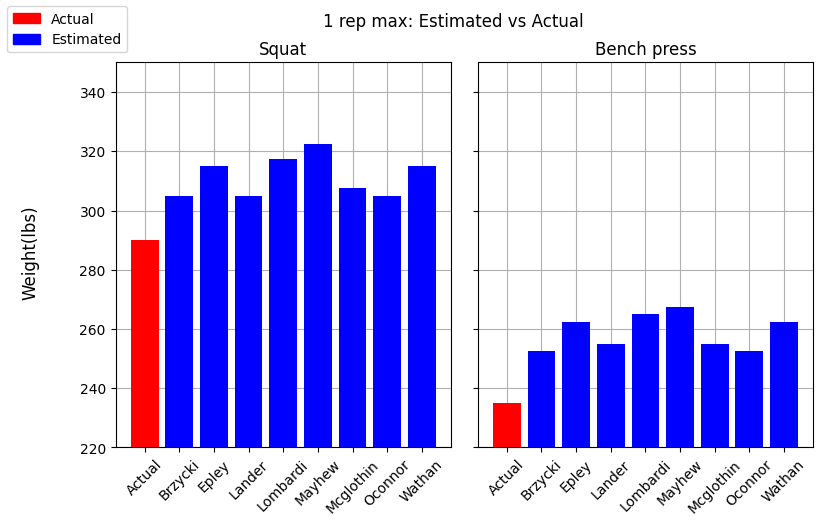

In [10]:
#Define Axis
x2 = df_bench.Calc_name
y2 = df_bench.Inc_25
x1 = df_squat.Calc_name
y1 = df_squat.Inc_25

#fig for adjusting entire figure, ax is for adjusting subplots specificied by index position of grid
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(9,5))
fig.suptitle('1 rep max: Estimated vs Actual')
fig.supylabel('Weight(lbs)')
fig.subplots_adjust(wspace=0.08) #adjust vertical spacing 

#squat subplot
ax[0].bar(x1,y1, color=colors, zorder = 3)
ax[0].grid(zorder=0)
ax[0].tick_params(axis = 'x', rotation = 45) 
ax[0].set_ylim([220, 350])
ax[0].set_title('Squat')

#bench subplot
ax[1].bar(x2,y2, color=colors, zorder=3)
ax[1].grid(zorder=0)
ax[1].tick_params(axis = 'x', rotation = 45) 
ax[1].set_ylim([220, 350])
ax[1].set_title('Bench press')
ax[1].tick_params('y', labelleft=False) #Remove y axis label

#create legend
import matplotlib.patches as mpatches
actual_r = mpatches.Patch(color='r', label='Actual')
estimated_b = mpatches.Patch(color='b',label='Estimated')
fig.legend(handles=[actual_r, estimated_b], loc='upper left')

# Summary:
From these graphs, we can see that my squat 1 rep max was higher than all the estimated, while my bench was much lower. This could be used to adapt future strength building programs to have an emphasis on strengthening my bench press movement.

## Limitations:
While this can be a great tool for getting a rough idea of what one might expect to lift for a 1 repitition max there are some limitations:
- Formula's leave out factors such as: body composition (weight, height, bodyfat, etc.), experience, age to name a few.
- Testing a person "true" max is challenging: We are all familiar with the physical aspect of lifting something heavy, but there is also a mental aspect at play. Subjective factors like mood, confidence, and determination would be challenging to control for.

